<Figure size 1000x600 with 0 Axes>

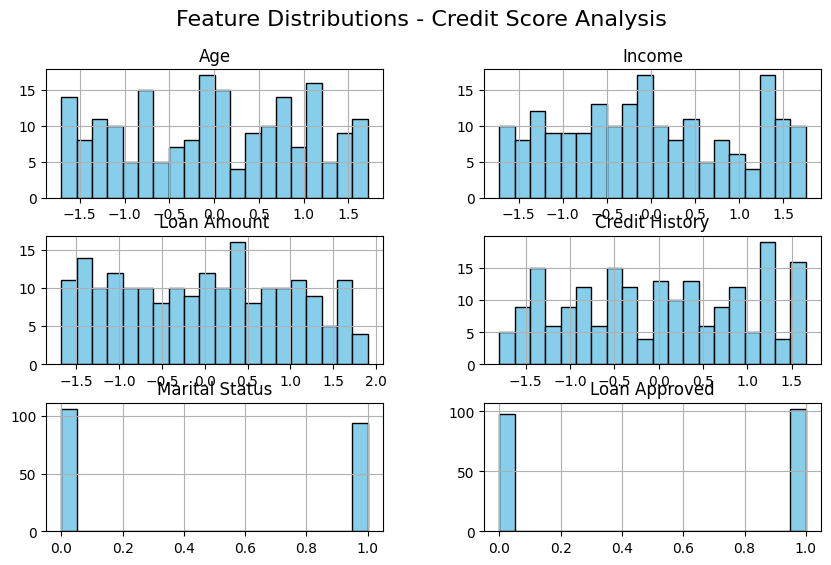

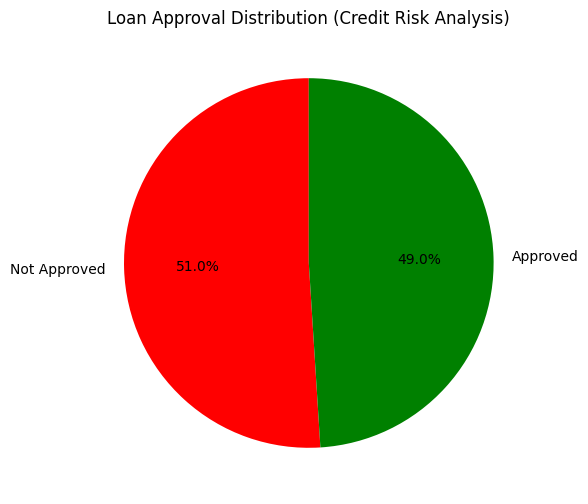

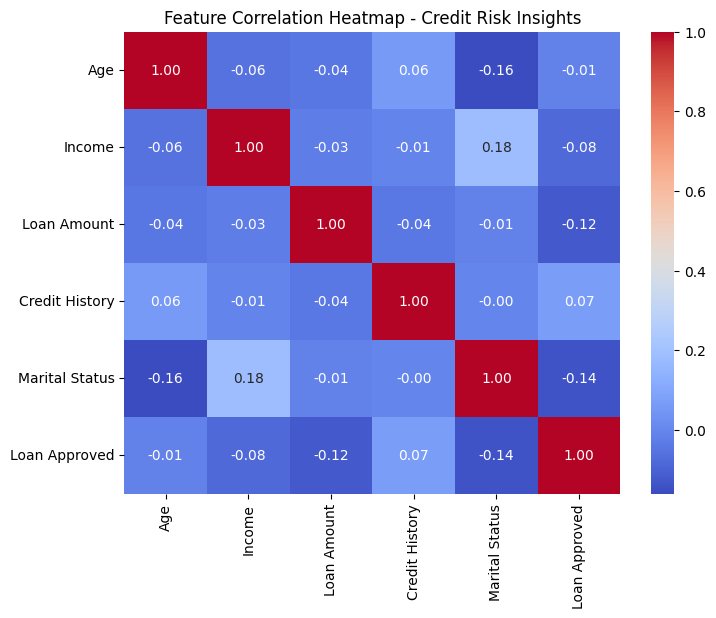

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 1: Generate Dummy Credit Score Data
def generate_credit_data(num_samples=200):
    """
    Function to generate a synthetic credit score dataset.
    Includes features like Age, Income, Loan Amount, Credit History, and Marital Status.
    The target variable is 'Loan Approved' (0 = Not Approved, 1 = Approved).
    """
    np.random.seed(42)  # Ensures reproducibility

    # Creating the dataset with random values
    data = {
        'Age': np.random.randint(18, 70, num_samples),  # Age between 18 and 70
        'Income': np.random.randint(2000, 15000, num_samples),  # Monthly income
        'Loan Amount': np.random.randint(1000, 50000, num_samples),  # Loan request amount
        'Credit History': np.random.randint(1, 30, num_samples),  # Credit history in months
        'Marital Status': np.random.choice([0, 1], num_samples),  # 0 = Single, 1 = Married
        'Loan Approved': np.random.choice([0, 1], num_samples)  # 0 = Not Approved, 1 = Approved
    }

    df = pd.DataFrame(data)

    # Introduce some missing values in 'Income' column for data cleaning step
    df.loc[np.random.choice(df.index, size=10, replace=False), 'Income'] = np.nan

    return df

# Generate the dataset
df = generate_credit_data(200)

# Step 2: Data Cleaning & Transformation
# Handle missing values: Fill missing 'Income' values with the median of the column
df.fillna(df.median(), inplace=True)

# Scale numerical features for better model performance
scaler = StandardScaler()
df[['Age', 'Income', 'Loan Amount', 'Credit History']] = scaler.fit_transform(df[['Age', 'Income', 'Loan Amount', 'Credit History']])

# Step 3: Data Visualization

# 1️⃣ Distribution of Features (Histograms)
plt.figure(figsize=(10, 6))
df.hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions - Credit Score Analysis", fontsize=16)  # Title for all plots
plt.show()

# 2️⃣ Loan Approval Rate (Pie Chart)
# This shows the percentage of loans that were approved vs. rejected
labels = ['Not Approved', 'Approved']
sizes = df['Loan Approved'].value_counts()  # Count of each category
colors = ['red', 'green']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Loan Approval Distribution (Credit Risk Analysis)")  # Title of pie chart
plt.show()

# 3️⃣ Correlation Heatmap (Feature Relationships)
# Helps understand the correlation between financial factors and loan approval
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Heatmap with correlations
plt.title("Feature Correlation Heatmap - Credit Risk Insights")  # Title
plt.show()
